In [71]:
'''class oilDrop(object, textFile):
    def __init__(self, textFile):
        dataArray = np.genfromtxt(textFile, delimiter = '\t', skip_header = True)
        self.event = 
        '''

"class oilDrop(object, textFile):\n    def __init__(self, textFile):\n        dataArray = np.genfromtxt(textFile, delimiter = '\t', skip_header = True)\n        self.event = \n        "

In [72]:
# all the libraries we will use
import time
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
%ls

 Volume in drive C has no label.
 Volume Serial Number is A4AD-16E2

 Directory of C:\Users\William Morse\ilikepie\ILab2\oilDrop

05/02/2016  02:56 PM    <DIR>          .
05/02/2016  02:56 PM    <DIR>          ..
04/27/2016  03:09 PM    <DIR>          .ipynb_checkpoints
05/02/2016  02:08 PM             1,308 april25DataRun.txt
04/27/2016  05:04 PM             1,635 april26DataRun.txt
05/02/2016  01:57 PM             2,441 april28DataRun.txt
05/02/2016  02:56 PM            35,190 oilDrop_data_anylisis1.ipynb
               4 File(s)         40,574 bytes
               3 Dir(s)  36,889,690,112 bytes free


In [73]:
print(time.strftime("%Y,%m,%d-%H,%M,%S")) # allows us to timestamp the data


2016,05,02-14,58,39


In [74]:
# read the header line so we can apropreately name the data columns
f = open('april25DataRun.txt', 'r')
print(f.readline(-1))
f.close()

event #	radiation dosage #	cap voltage	temperature (thremosistor ohms)	fall time (s)	risetime (s)	distange (mm) [major reticle lines are .5 mm]	pressure (cm Mg)



In [75]:
dataArray25 = np.genfromtxt('april25DataRun.txt', delimiter = '\t', skip_header = True)
#check for discontinutities
print('data array april 25th:\n%s' % dataArray25)
eventNumber25 = dataArray25[:,0]
radiationDosageNumber25 = dataArray25[:,1]
capVoltage25 = dataArray25[:,2]
thermosistorResistance25 = dataArray25[:,3]
fallTime25 = dataArray25[:,4]
riseTime25 = dataArray25[:,5]
riseFallDist25 = dataArray25[:,6]
pressure25 = np.zeros(len(eventNumber25))
print('pressure array pre filling: \n%s' % pressure25)
pressure25.fill(dataArray25[0,7])
print('pressure array post filling: \n%s' % pressure25)
print('fall times: \n%s' % fallTime25)

data array april 25th:
[[   1.      0.    496.      1.92   31.66   68.87    2.     76.6 ]
 [   1.      0.    496.1     1.92   32.21   74.35    2.       nan]
 [   1.      0.    496.1     1.91   32.68   74.47    2.       nan]
 [   1.      0.    496.2     1.91   33.26   77.9     2.       nan]
 [   1.      1.    496.2     1.9    33.7    27.53    2.       nan]
 [   1.      1.    496.2     1.89   33.13   28.36    2.       nan]
 [   2.      0.    496.4     1.88   65.26    4.43    2.       nan]
 [   2.      0.    496.5     1.87   69.26    4.43    2.       nan]
 [   2.      0.    496.5     1.87   65.91    4.61    2.       nan]
 [   2.      0.    496.5     1.87   71.06    3.8     2.       nan]
 [   2.      1.    496.5     1.87   70.85    4.03    2.       nan]
 [   2.      1.    496.5     1.86   68.25    3.95    2.       nan]
 [   2.      1.    496.6     1.85   67.73    3.81    2.       nan]
 [   2.      2.    496.6     1.86   67.35    3.85    2.       nan]
 [   2.      2.    496.6     1.85   71.

In [76]:
# now do the same for the rest of the data runs
# read the header line so we can apropreately name the data columns
f = open('april26DataRun.txt', 'r')
print(f.readline(-1))
f.close()

event #	radiation dosage #	temperature (thremosistor ohms)	fall time (s)	cap voltage	risetime (s)	distange (mm) [major reticle lines are .5 mm]	pressure (cm Mg)



In [77]:
dataArray26 = np.genfromtxt('april26DataRun.txt', delimiter = '\t', skip_header = True)
eventNumber26 = dataArray26[:,0]
radiationDosageNumber26 = dataArray26[:,1]
thermosistorResistance26 = dataArray26[:,2]
fallTime26 = dataArray26[:,3]
capVoltage26 = dataArray26[:,4]
riseTime26 = dataArray26[:,5]
riseFallDist26 = dataArray26[:,6]
pressure26 = np.zeros(len(eventNumber26))
print('pressure array pre filling: \n%s' % pressure26)
pressure26.fill(dataArray26[39,7])
print('pressure array post filling: \n%s' % pressure26)
#print('fall times: \n%s' % fallTime26)

pressure array pre filling: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
pressure array post filling: 
[ 75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86]


In [78]:
# and finally for the last data run
# read the header line so we can apropreately name the data columns
f = open('april28DataRun.txt', 'r')
print(f.readline(-1))
f.close()

event #	radiation dosage #	temperature (thremosistor ohms)	fall time (s)	cap voltage	risetime (s)	distange (mm) [major reticle lines are .5 mm]	pressure (cm Mg)



In [79]:
dataArray28 = np.genfromtxt('april28DataRun.txt', delimiter = '\t', skip_header = True)
eventNumber28 = dataArray28[:,0]
radiationDosageNumber28 = dataArray28[:,1]
thermosistorResistance28 = dataArray28[:,2]
fallTime28 = dataArray28[:,3]
capVoltage28 = dataArray28[:,4]
riseTime28 = dataArray28[:,5]
riseFallDist28 = dataArray28[:,6]
pressure28 = np.zeros(len(eventNumber28))
print('pressure array pre filling: \n%s' % pressure28)
pressure28.fill(dataArray28[0,7])
print('pressure array post filling: \n%s' % pressure28)
#print('fall times: \n%s' % fallTime28)

pressure array pre filling: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
pressure array post filling: 
[ 76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34]


In [96]:
# now we want to combine all the data into a master array
# most things we can simply concatinate, but we want to make the event numbers go up
print('last event number: %s'%eventNumber25[-1])
#then add the last event number to the next day's data so we increment event numbers
eventNumber26 += eventNumber25[-1]+1 # plus one because event numbers start at 0! 
eventNumber28 += eventNumber26[-1]+1
# now we can concat the array's together
eventNumber = np.concatenate((eventNumber25, eventNumber26, eventNumber28))
#print('master event number list:\n%s'  % eventNumber)

radiationDosage = np.concatenate((radiationDosageNumber25, radiationDosageNumber26, radiationDosageNumber28))

thermoResistance = np.concatenate((thermosistorResistance25, thermosistorResistance26, thermosistorResistance28))
#print(thermoResistance)

capVoltage = np.concatenate((capVoltage25, capVoltage26, capVoltage28))
#print(capVoltage)
#print(len(capVoltage))

riseTime = np.concatenate((riseFallDist25, riseFallDist26, riseFallDist28))
fallTime = np.concatenate((fallTime25, fallTime26, fallTime28))
pressure = np.concatenate((pressure25,  pressure26, pressure28))
print(pressure)

last event number: 4.0
[ 76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6
  76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6
  76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6   76.6
  76.6   76.6   76.6   76.6   76.6   75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86  75.86
  75.86  75.86  75.86  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34  76.34
  76.34  76.34  76.34  76.34  76.34 

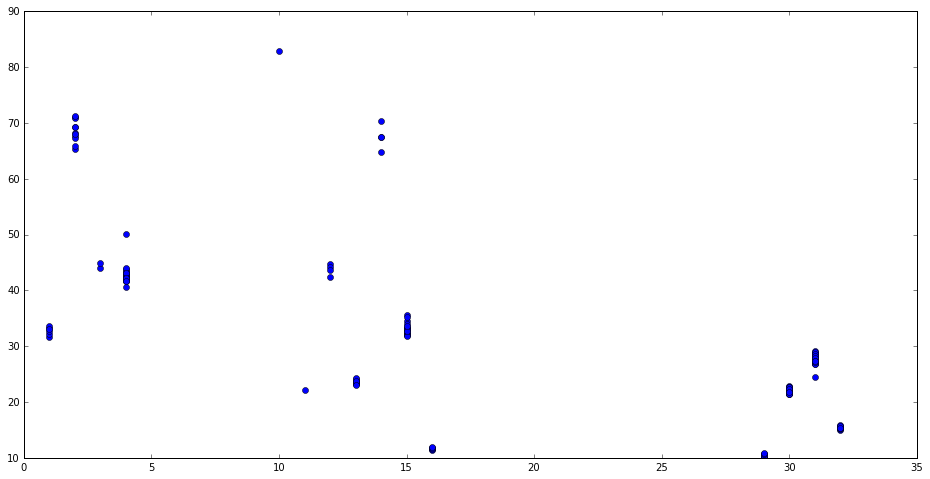

In [97]:
plt.plot(eventNumber, fallTime, 'o')
plt.show()

In [98]:
print(fallTime)
print(eventNumber)

[ 31.66  32.21  32.68  33.26  33.7   33.13  65.26  69.26  65.91  71.06
  70.85  68.25  67.73  67.35  71.26  69.31  68.    43.98  44.91  41.69
  42.51  43.13  43.8   41.86  43.54  42.75  41.96  42.48  50.13  40.56
  42.73  42.41  43.28  43.96  41.7   43.06  42.16  41.63  82.9   22.11
  42.36  44.75  44.13  43.65  23.5   23.51  23.26  23.26  23.46  23.8
  24.06  24.33  23.8   23.11  67.5   70.28  64.76  67.41  32.91  35.6
  34.58  32.18  33.18  33.45  32.18  34.03  32.08  32.05  32.26  32.78
  35.18  33.06  32.58  33.03  33.15  31.91  32.81  33.61  11.73  11.51
  11.31  11.71  11.76  11.51  11.78  11.9   10.51  10.46  10.6   10.55
  10.38  10.53  10.36  10.25  10.5   10.41  10.45  10.66  10.38  10.6
  10.38  10.61  10.8   21.51  21.56  22.05  22.91  22.73  22.71  22.38
  21.46  21.83  21.66  21.64  22.03  22.63  22.2   21.83  22.25  21.65
  21.41  21.86  28.13  27.88  28.85  28.    27.85  29.11  28.75  28.26
  27.95  28.95  28.2   28.56  26.99  27.14  24.46  26.96  27.23  28.1
  27.93  2

In [99]:
#merritt code!

In [100]:
'''Declare global variables! On data taking days check, record and declare barametric pressure.
Find Vf and Vr for each event and enter into subsequent catagory. Calculate q.'''
p = 76.32 #barametric pressure in cm of mercury
Vf = 0.0189#velocity of fall cm/s
Vr = 0.0091#velocity of rise cm/s

V = 496.6 # potential difference volts
d = 0.7625 # plate seperation in cm
roe = 0.866 # density of oil in g/cm^3
g = 981.0 #gravity in cm/s^2
N = 0.00018 # viscosity of air in dyne*s/cm^2
b = .000617 # constant in cm of hg*cm

## Calcuate the drops radius

First, we Calculate the radius of oil drop using Stokes' law, relating the radius of a spherical body to its velocity of fall in a viscous medium. We use global variables density $\rho$ = 0.866 $\frac{g}{cm^3}$, viscosity of air $\eta$ = 0.00018 $\frac{dyne\cdot s}{cm^2}$ and little g is 981.0 $\frac{cm}{s^2}$. Returns variable 'a' wich is equal to the drops radius
\begin{equation}
a = \sqrt{\frac{9\eta v_f}{2g\rho}}
\end{equation}

In [101]:
def dropRadius(N,Vf,g,roe):
    '''Calculates the radius of oil drop using Stokes' law, relating the radius 
    of a spherical body to its velocity of fall in a viscous medium. Where the 
    density (roe) is given as 0.866 g/cm^3, N is viscosity of air 0.00018 dyne*s/cm^2
    and little g is 981.0 cm/s^2. Returns variable 'a' wich is equal to the drops radius'''
    
    a = np.sqrt((9*N*Vf)/(2*g*roe))
    return(a)

print(dropRadius(N,Vf,g,roe))

0.000134239387473


Since the oil droplets will be on the order of 2 microns which is comprable to the mean free path of air molecules we must use a correction factor to calculate the effective viscosity.
\begin{equation}
\eta_{eff} = \eta\bigg(\frac{1}{1+\frac{b}{pa}}\bigg)
\end{equation}
Substituting the correction factor into equation for Stokes Law approximaton of a, we get.
\begin{equation}
a = \sqrt{\bigg(\frac{b}{2p}\bigg)^2\frac{9\eta v_f}{2g\rho}}-\frac{b}{2p}
\end{equation}

In [102]:
def dropRadiusEtaCorrection(b,p,N,Vf,g,roe):
    '''Adding a correction factor to calculate the effective viscosity of air in poise, this function 
    calculates the radius of oil drop using Stokes' law, relating the radius 
    of a spherical body to its velocity of fall in a viscous medium. Where the 
    density (roe) is given as 0.866 g/cm^3, N is viscosity of air 0.00018 dyne*s/cm^2
    and little g is 981.0 cm/s^2. Returns variable 'a' wich is equal to the drops radius'''
    a_corrected = np.sqrt(((b/2*p)**2)+((9*N*Vf)/(2*g*roe)))-(b/2*p)
    return(a_corrected)

a = dropRadiusEtaCorrection(b,p,N,Vf,g,roe)
print(a)

3.82677447581e-07


## Calculate the charge
Finaly, use the using the $\eta$ corrected radius of the droplet calculate the cahrge in e.s.u. using 
\begin{equation}
q = \bigg|400 \pi d \bigg(\frac{1}{g\rho}{\bigg|\frac{9\eta}{2}}^3\bigg| \bigg)^{\frac{1}{2}}\bigg|\cdot\bigg| \bigg(\frac{1}{1+\frac{b}{pa}}\bigg)^\frac{3}{2} \bigg|\cdot\bigg| \frac{v_f + v_r \sqrt{v_f}}{V}\bigg|
\end{equation}

In [103]:
def charge(d,g,p,N,b,a,Vf,Vr,V):
    '''Calculates the charge on a selected mineral oil droplet. If the drop 
    is greater than 5 excess electrons choose a slower moving droplet'''

    I = np.abs(400*np.pi*d*(1/(g*roe)*np.abs((9*N/2)**3))**(1/2))
    J = np.abs((1/(1+(b/(p*a))))**(2/3)**(3/2))
    K = np.abs((Vf+Vr*np.sqrt(Vf))/V)
    return(I*J*K)

In [104]:
print('example charge: %s' % charge(d,g,p,N,b,a,Vf,Vr,V))

example charge: 5.69906917081e-09


In [113]:
# now we want to use merritt's same functions and find the charge for each entry:
"""p = 76.32 #barametric pressure in cm of mercury
Vf = 0.0189#velocity of fall cm/s
Vr = 0.0091#velocity of rise cm/s

V = 496.6 # potential difference volts
d = 0.7625 # plate seperation in cm
roe = 0.866 # density of oil in g/cm^3
g = 981.0 #gravity in cm/s^2
N = 0.00018 # viscosity of air in dyne*s/cm^2
b = .000617 # constant in cm of hg*cm"""

# calculate velocities from the rise and fall arrays
fallVel = 0.2 / fallTime
riseVel = 0.2 / riseTime

# loop through the data and run Merritt's Q finding meathod
correctedDropRadius = np.zeros(len(eventNumber))
for i in range(len(eventNumber)):
    correctedDropRadius[i] = dropRadiusEtaCorrection(b,p,N,fallVel[i],g,roe)
    
#print(correctedDropRadius)

In [118]:
dropletCharge = np.zeros(len(eventNumber))
for i in range(len(eventNumber)):
    dropletCharge[i] = charge(d,
                              g,
                              p,
                              N,
                              b,
                              correctedDropRadius[i],
                              fallVel[i],
                              riseVel[i],
                              capVoltage[i])
print(dropletCharge)

[  2.26183578e-09   2.21295618e-09   2.17305712e-09   2.12517333e-09
   2.09042861e-09   2.13564188e-09   9.23152075e-10   8.58519235e-10
   9.11890797e-10   8.32179597e-10   8.35174766e-10   8.73987514e-10
   8.81977245e-10   8.88034685e-10   8.29178568e-10   8.57593970e-10
   8.77719737e-10   1.48114801e-09   1.44323991e-09   1.58245995e-09
   1.54463859e-09   1.51713030e-09   1.48840139e-09   1.57447972e-09
   1.49943006e-09   1.53357695e-09   1.56950770e-09   1.54568538e-09
   1.25940694e-09   1.63712841e-09   1.53446788e-09   1.54854532e-09
   1.51000929e-09   1.48109913e-09   1.58135920e-09   1.51958609e-09
   1.55995548e-09   1.58466371e-09   6.86897174e-10   3.53363211e-09
   1.55763045e-09   1.45455463e-09   1.47962160e-09              nan
   3.26423235e-09   3.26246512e-09   3.30717363e-09   3.30717363e-09
   3.27131868e-09   3.21132085e-09   3.16724547e-09   1.69930504e-09
   1.74757221e-09   1.81406604e-09   8.80492561e-10   8.38340940e-10
   4.53720126e-10              nan

In [131]:
#remove the nan values
eventNumber = eventNumber[~np.isnan(dropletCharge)]
dropletCharge = dropletCharge[~np.isnan(dropletCharge)]
#print(dropletCharge)
print(len(dropletCharge))
print(len(eventNumber))

158
158


C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 161 but corresponding boolean dimension is 158
  if __name__ == '__main__':


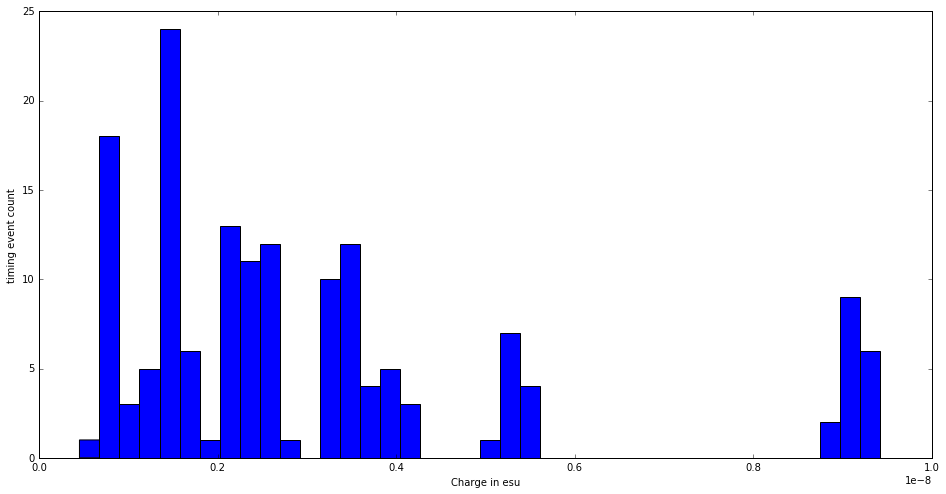

In [134]:
plt.hist(dropletCharge, bins=40)
plt.xlabel('Charge in esu')
plt.ylabel('timing event count')
plt.show()

In [133]:
# average out the charges that have the same event number
lastEvent = eventNumber[0]

averageCharge = dropletCharge[0]
divisor = 1

averageChargeArray = []
for i in range(1,len(eventNumber)):
    if eventNumber[i] == lastEvent:
        averageCharge += dropletCharge[i]
        #print(averageCharge)
        divisor += 1
        #print('d=%s'%divisor)
    else:
        #averageCharge /= divisor
        averageChargeArray.append(averageCharge/divisor)
        averageCharge = dropletCharge[i]
        divisor = 1
    lastEvent = eventNumber[i]
    #print(lastEvent)
averageChargeArray.append(averageCharge/divisor)
print(averageChargeArray)

[2.1665154826676023e-09, 8.699461988323136e-10, 1.4621939603966695e-09, 1.530080605287264e-09, 6.8689717355959876e-10, 3.5336321065132195e-09, 1.9390097573573495e-09, 2.5668133230680146e-09, 7.4270786873569418e-10, 2.3595579346870574e-09, 5.2775718812278459e-09, 8.4814719573237635e-09, 3.3400566692600865e-09, 2.2449658899122962e-09, 5.3010842227282127e-09]


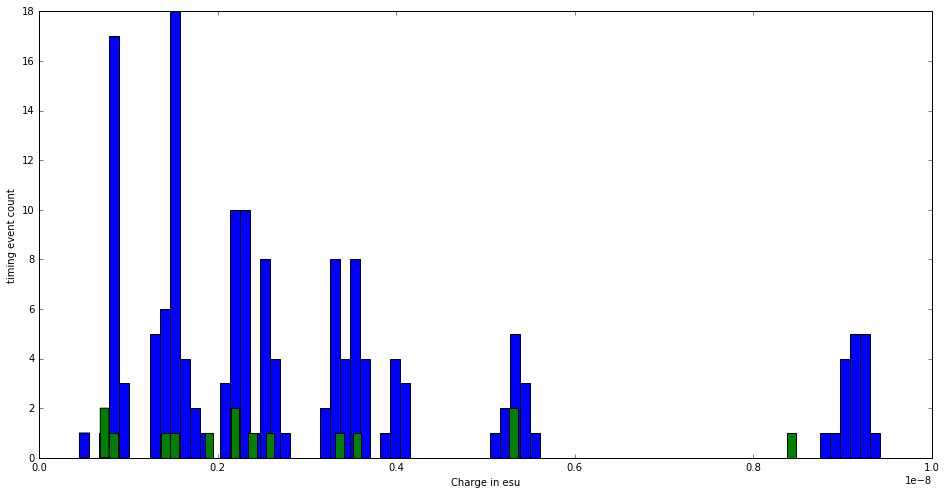

In [144]:

plt.hist(dropletCharge, bins=80)
plt.xlabel('Charge in esu')
plt.ylabel('timing event count')
plt.hist(averageChargeArray, bins=80)
plt.show()